In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [6]:
y_proba = model.predict_proba(X_test)[:, 1]


Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104


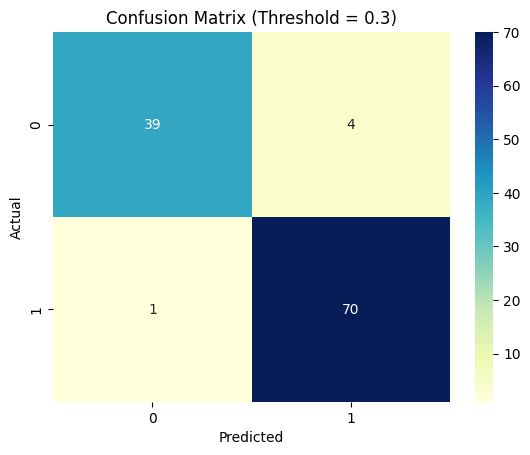


Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104


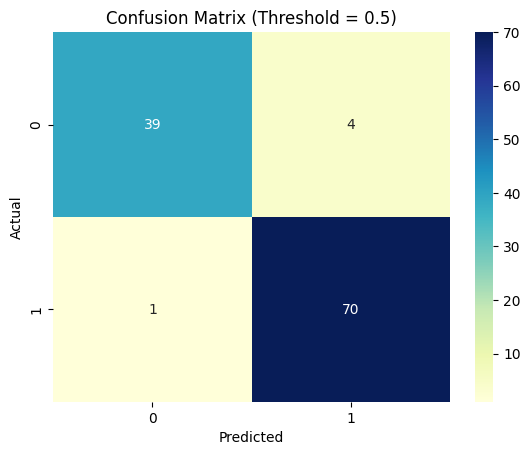


Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791


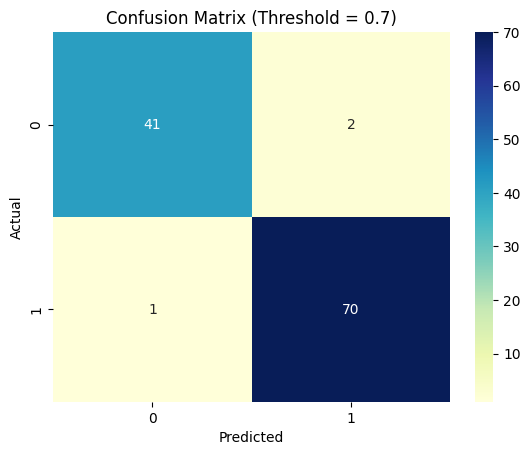

In [7]:
thresholds = [0.3, 0.5, 0.7]

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"\nThreshold: {thresh}")
    print("Confusion Matrix:\n", cm)
    print("F1 Score:", f1)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix (Threshold = {thresh})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


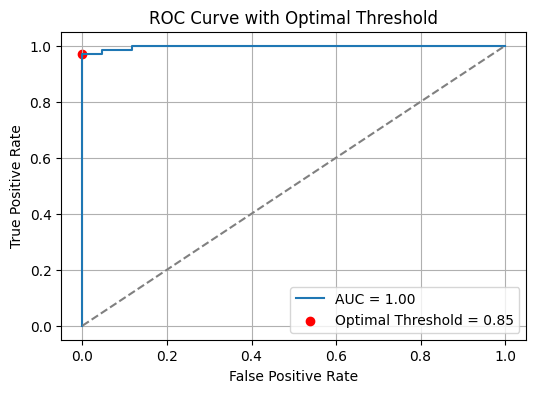


Optimal Threshold: 0.85


In [9]:
fpr, tpr, thresh = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresh[optimal_idx]

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
